In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
from edisgo.edisgo import import_edisgo_from_files
from edisgo.network.timeseries import get_component_timeseries
import edisgo.flex_opt.charging_ev as cEV
import edisgo.flex_opt.optimization as opt
from edisgo.tools.networkx_helper import get_downstream_nodes_matrix_iterative

c:\users\anya.heider\appdata\local\continuum\miniconda3\envs\edisgo_env\lib\site-packages\sqlalchemy\ext\declarative\base.py:436: SAWarning: Ignoring declarative-like tuple value of attribute 'segment': possibly a copy-and-paste error with a comma accidentally placed at the end of the line?
  "accidentally placed at the end of the line?" % k
c:\users\anya.heider\appdata\local\continuum\miniconda3\envs\edisgo_env\lib\site-packages\sqlalchemy\ext\declarative\base.py:436: SAWarning: Ignoring declarative-like tuple value of attribute 'cable': possibly a copy-and-paste error with a comma accidentally placed at the end of the line?
  "accidentally placed at the end of the line?" % k


In [4]:
grid_dir = 'C:/Users/Anya.Heider/DistFlex/AllgaeuNetz/data'
ev_dir = 'C:/Users/Anya.Heider/DistFlex/AllgaeuNetz/data/' \
         'BEV_medium_00002_standing_times.csv'

# Minimum working example
Simple grid with following topology: 
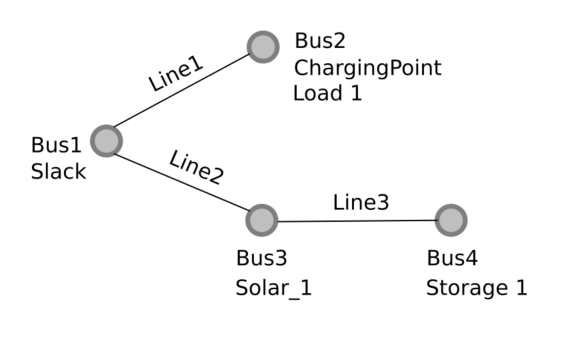

In [5]:
timeindex = pd.date_range('2011-01-01', periods=8760, freq='h')
timeindex_charging = pd.date_range('2011-01-01', periods=8760, freq='15min')
storage_ts = pd.DataFrame({'Storage 1': 8760*[0]}, index=timeindex)

edisgo = import_edisgo_from_files(grid_dir)
get_component_timeseries(edisgo, timeseries_load='demandlib',
                timeseries_generation_fluctuating='oedb',
                timeseries_storage_units=storage_ts)
timesteps = edisgo.timeseries.timeindex[0:24]

In [6]:
ev_data = pd.read_csv(ev_dir, index_col=0)
charging_events = ev_data.loc[ev_data.chargingdemand>0]
energy_bands = cEV.get_ev_timeseries(charging_events, mode='single_week')
energy_bands.loc[energy_bands.upper!=energy_bands.lower]

C:\Users\Anya.Heider\DistFlex\eDisGo_mirror\edisgo\flex_opt\charging_ev.py:1459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  'netto_charging_capacity'] * 4


,lower,upper,power
213,0.000000,5.179755,50.0
214,0.000000,5.179755,50.0
215,0.000000,5.179755,50.0
216,0.000000,5.179755,50.0
217,0.000000,5.179755,50.0
218,0.000000,5.179755,50.0
219,0.000000,5.179755,50.0
220,0.000000,5.179755,50.0
221,0.000000,5.179755,50.0
222,0.000000,5.179755,50.0


In [16]:
timeindex_charging = pd.date_range('2011-01-01', periods=8760, freq='15min')
energy_band_ev = energy_bands.iloc[210:]
energy_band_ev.set_index(timeindex_charging[0:len(energy_band_ev)], inplace=True)
energy_band_ev.upper = energy_band_ev.upper.astype(float)
energy_band_ev.lower = energy_band_ev.lower.astype(float)
energy_band_ev = energy_band_ev.resample('h').min()

C:\Users\Anya.Heider\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:5086: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Matrix for 4 buses is extracted.
Starting iteration.


<AxesSubplot:>

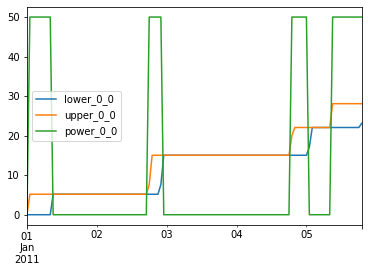

In [17]:
cp_ags_idx = [[0, 0]]
mapping = pd.DataFrame(index=edisgo.topology.charging_points_df.index, columns=['ags', 'cp_idx'], data=cp_ags_idx)
downstream_node_matrix = get_downstream_nodes_matrix_iterative(edisgo)
energy_band_charging_point = energy_band_ev.rename(columns=({
    'lower': 'lower_{}_{}'.format(cp_ags_idx[0][0], cp_ags_idx[0][1]),
    'upper': 'upper_{}_{}'.format(cp_ags_idx[0][0], cp_ags_idx[0][1]),
    'power': 'power_{}_{}'.format(cp_ags_idx[0][0], cp_ags_idx[0][1])
}))
energy_band_charging_point.plot()

In [40]:
model = opt.setup_model(edisgo, downstream_node_matrix=downstream_node_matrix, mapping_cp=mapping,
                        timesteps=timesteps, energy_band_charging_points=energy_band_charging_point, 
                        print_model=True)

Setup model: Defining sets and parameters.
First timestep: 0, last timestep: 23.
Setup model: Defining variables.
Setup model: Setting constraints.
Setup model: Setting objective.
32 Set Declarations
    ActivePower_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain            : Size : Members
        None :     2 : line_set*time_set :   72 : {('Line 1', 0), ('Line 1', 1), ('Line 1', 2), ('Line 1', 3), ('Line 1', 4), ('Line 1', 5), ('Line 1', 6), ('Line 1', 7), ('Line 1', 8), ('Line 1', 9), ('Line 1', 10), ('Line 1', 11), ('Line 1', 12), ('Line 1', 13), ('Line 1', 14), ('Line 1', 15), ('Line 1', 16), ('Line 1', 17), ('Line 1', 18), ('Line 1', 19), ('Line 1', 20), ('Line 1', 21), ('Line 1', 22), ('Line 1', 23), ('Line 2', 0), ('Line 2', 1), ('Line 2', 2), ('Line 2', 3), ('Line 2', 4), ('Line 2', 5), ('Line 2', 6), ('Line 2', 7), ('Line 2', 8), ('Line 2', 9), ('Line 2', 10), ('Line 2', 11), ('Line 2', 12), ('Line 2', 13), ('Line 2', 14), ('Line 2', 15), ('Line 2', 16)

        Key               : Lower : Body                                                                 : Upper : Active
         ('Storage 1', 1) :   0.0 :    soc[Storage 1,1] - (soc[Storage 1,0] - 0.9*charging[Storage 1,0]) :   0.0 :   True
         ('Storage 1', 2) :   0.0 :    soc[Storage 1,2] - (soc[Storage 1,1] - 0.9*charging[Storage 1,1]) :   0.0 :   True
         ('Storage 1', 3) :   0.0 :    soc[Storage 1,3] - (soc[Storage 1,2] - 0.9*charging[Storage 1,2]) :   0.0 :   True
         ('Storage 1', 4) :   0.0 :    soc[Storage 1,4] - (soc[Storage 1,3] - 0.9*charging[Storage 1,3]) :   0.0 :   True
         ('Storage 1', 5) :   0.0 :    soc[Storage 1,5] - (soc[Storage 1,4] - 0.9*charging[Storage 1,4]) :   0.0 :   True
         ('Storage 1', 6) :   0.0 :    soc[Storage 1,6] - (soc[Storage 1,5] - 0.9*charging[Storage 1,5]) :   0.0 :   True
         ('Storage 1', 7) :   0.0 :    soc[Storage 1,7] - (soc[Storage 1,6] - 0.9*charging[Storage 1,6]) :   0.0 :   True
         ('Storage 1', 8

<AxesSubplot:>

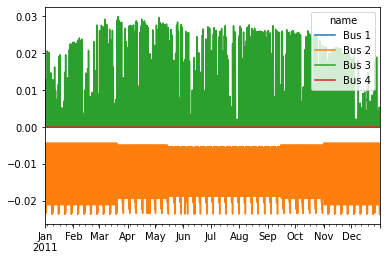

In [43]:
model.nodal_active_power.T.plot()

In [27]:
x_charge, soc, x_charge_ev, energy_level_cp, curtailment_feedin, \
               curtailment_load, curtailment_reactive_feedin, curtailment_reactive_load, \
               v_bus, p_line, q_line  = opt.optimize(model, 'glpk')

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpzgbxcc3l.glpk.raw --wglp
 C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpzpot_fi9.glpk.glp --cpxlp C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpcio_1hof.pyomo.lp
Reading problem data from 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpcio_1hof.pyomo.lp'...
290 rows, 721 columns, 1054 non-zeros
3036 lines were read
Writing problem data to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpzpot_fi9.glpk.glp'...
2815 lines were written
GLPK Simplex Optimizer, v4.65
290 rows, 721 columns, 1054 non-zeros
Preprocessing...
247 rows, 421 columns, 769 non-zeros
Scaling...
 A: min|aij| =  8.970e-03  max|aij| =  1.000e+00  ratio =  1.115e+02
GM: min|aij| =  8.942e-01  max|aij| =  1.118e+00  ratio =  1.251e+00
EQ: min|aij| =  8.208e-01  max|aij| =  1.000e+00  ratio =  1.218e+00
Constructing initial basis...
Size of triangular part is 247
      0: obj =  -2.322772931e+00 inf =   8.049e+00 (4

<AxesSubplot:>

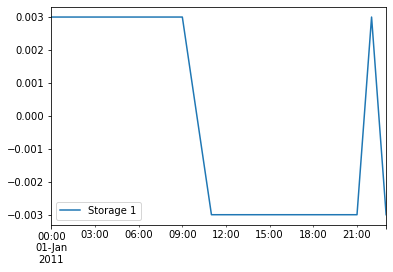

In [28]:
x_charge.plot()

<AxesSubplot:>

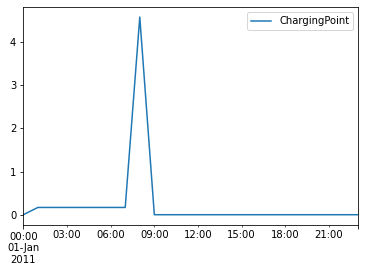

In [29]:
x_charge_ev.plot()

<AxesSubplot:>

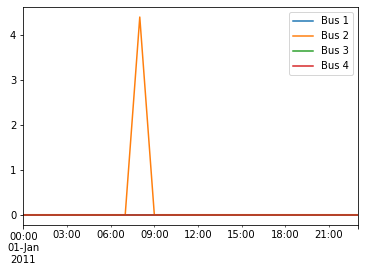

In [30]:
curtailment_load.plot()

<AxesSubplot:>

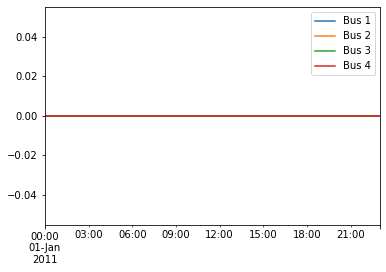

In [34]:
curtailment_feedin.plot()

In [33]:
sum(curtailment_load.values)

array([0.        , 4.40844061, 0.        , 0.        ])

In [31]:
p_line

,Line 1,Line 2,Line 3
2011-01-01 00:00:00,0.000000,3.000000e-03,3.000000e-03
2011-01-01 01:00:00,-0.168355,3.000000e-03,3.000000e-03
2011-01-01 02:00:00,-0.168355,3.000000e-03,3.000000e-03
2011-01-01 03:00:00,-0.168355,3.000000e-03,3.000000e-03
2011-01-01 04:00:00,-0.168355,3.000000e-03,3.000000e-03
2011-01-01 05:00:00,-0.168355,3.000000e-03,3.000000e-03
2011-01-01 06:00:00,-0.168355,3.000000e-03,3.000000e-03
2011-01-01 07:00:00,-0.168355,3.000000e-03,3.000000e-03
2011-01-01 08:00:00,-0.168355,3.000000e-03,3.000000e-03
2011-01-01 09:00:00,0.000000,3.000000e-03,3.000000e-03


In [35]:
q_line

,Line 1,Line 2,Line 3
2011-01-01 00:00:00,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0
2011-01-01 02:00:00,0.0,0.0,0.0
2011-01-01 03:00:00,0.0,0.0,0.0
2011-01-01 04:00:00,0.0,0.0,0.0
2011-01-01 05:00:00,0.0,0.0,0.0
2011-01-01 06:00:00,0.0,0.0,0.0
2011-01-01 07:00:00,0.0,0.0,0.0
2011-01-01 08:00:00,0.0,0.0,0.0
2011-01-01 09:00:00,0.0,0.0,0.0


In [24]:
v_bus

,Bus 1,Bus 2,Bus 3,Bus 4
2011-01-01 00:00:00,20.0,20.000000,19.999998,19.999997
2011-01-01 01:00:00,20.0,19.999903,20.000000,19.999999
2011-01-01 02:00:00,20.0,19.999903,20.000002,20.000003
2011-01-01 03:00:00,20.0,19.999903,20.000002,20.000003
2011-01-01 04:00:00,20.0,19.999903,19.999999,19.999997
2011-01-01 05:00:00,20.0,19.999903,19.999998,19.999997
2011-01-01 06:00:00,20.0,19.999903,20.000002,20.000003
2011-01-01 07:00:00,20.0,19.999903,20.000002,20.000003
2011-01-01 08:00:00,20.0,19.999903,20.000002,20.000003
2011-01-01 09:00:00,20.0,20.000000,19.999998,19.999997


In [14]:
timeindex[timeindex.week ==1]

DatetimeIndex(['2011-01-03 00:00:00', '2011-01-03 01:00:00',
               '2011-01-03 02:00:00', '2011-01-03 03:00:00',
               '2011-01-03 04:00:00', '2011-01-03 05:00:00',
               '2011-01-03 06:00:00', '2011-01-03 07:00:00',
               '2011-01-03 08:00:00', '2011-01-03 09:00:00',
               ...
               '2011-01-09 14:00:00', '2011-01-09 15:00:00',
               '2011-01-09 16:00:00', '2011-01-09 17:00:00',
               '2011-01-09 18:00:00', '2011-01-09 19:00:00',
               '2011-01-09 20:00:00', '2011-01-09 21:00:00',
               '2011-01-09 22:00:00', '2011-01-09 23:00:00'],
              dtype='datetime64[ns]', length=168, freq='H')

In [15]:
timesteps_2 = edisgo.timeseries.timeindex[12:36]

In [16]:
model = opt.update_model(model, timesteps_2, energy_band_charging_point, 
                        print_model=True)

30 Set Declarations
    ActivePower_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain            : Size : Members
        None :     2 : line_set*time_set :   72 : {('Line 1', 0), ('Line 1', 1), ('Line 1', 2), ('Line 1', 3), ('Line 1', 4), ('Line 1', 5), ('Line 1', 6), ('Line 1', 7), ('Line 1', 8), ('Line 1', 9), ('Line 1', 10), ('Line 1', 11), ('Line 1', 12), ('Line 1', 13), ('Line 1', 14), ('Line 1', 15), ('Line 1', 16), ('Line 1', 17), ('Line 1', 18), ('Line 1', 19), ('Line 1', 20), ('Line 1', 21), ('Line 1', 22), ('Line 1', 23), ('Line 2', 0), ('Line 2', 1), ('Line 2', 2), ('Line 2', 3), ('Line 2', 4), ('Line 2', 5), ('Line 2', 6), ('Line 2', 7), ('Line 2', 8), ('Line 2', 9), ('Line 2', 10), ('Line 2', 11), ('Line 2', 12), ('Line 2', 13), ('Line 2', 14), ('Line 2', 15), ('Line 2', 16), ('Line 2', 17), ('Line 2', 18), ('Line 2', 19), ('Line 2', 20), ('Line 2', 21), ('Line 2', 22), ('Line 2', 23), ('Line 3', 0), ('Line 3', 1), ('Line 3', 2), ('Line 3', 3), ('Line

        Key                   : Lower : Body                                                                                                        : Upper : Active
         ('ChargingPoint', 1) :   0.0 :    energy_level_ev[ChargingPoint,1] - (energy_level_ev[ChargingPoint,0] + 0.9*charging_ev[ChargingPoint,0]) :   0.0 :   True
         ('ChargingPoint', 2) :   0.0 :    energy_level_ev[ChargingPoint,2] - (energy_level_ev[ChargingPoint,1] + 0.9*charging_ev[ChargingPoint,1]) :   0.0 :   True
         ('ChargingPoint', 3) :   0.0 :    energy_level_ev[ChargingPoint,3] - (energy_level_ev[ChargingPoint,2] + 0.9*charging_ev[ChargingPoint,2]) :   0.0 :   True
         ('ChargingPoint', 4) :   0.0 :    energy_level_ev[ChargingPoint,4] - (energy_level_ev[ChargingPoint,3] + 0.9*charging_ev[ChargingPoint,3]) :   0.0 :   True
         ('ChargingPoint', 5) :   0.0 :    energy_level_ev[ChargingPoint,5] - (energy_level_ev[ChargingPoint,4] + 0.9*charging_ev[ChargingPoint,4]) :   0.0 :   True
         (

In [17]:
x_charge_2, soc_2, x_charge_ev_2, energy_band_cp_2, curtailment_feedin_2, curtailment_load_2 = opt.optimize(model, 'glpk')

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmp03ryhbdk.glpk.raw --wglp
 C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpq12ndcgm.glpk.glp --cpxlp C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpe_96rp2t.pyomo.lp
Reading problem data from 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpe_96rp2t.pyomo.lp'...
338 rows, 531 columns, 1006 non-zeros
2752 lines were read
Writing problem data to 'C:\Users\ANYA~1.HEI\AppData\Local\Temp\tmpq12ndcgm.glpk.glp'...
2485 lines were written
GLPK Simplex Optimizer, v4.65
338 rows, 531 columns, 1006 non-zeros
Preprocessing...
199 rows, 255 columns, 569 non-zeros
Scaling...
 A: min|aij| =  2.305e-02  max|aij| =  1.000e+00  ratio =  4.338e+01
GM: min|aij| =  8.403e-01  max|aij| =  1.190e+00  ratio =  1.416e+00
EQ: min|aij| =  7.208e-01  max|aij| =  1.000e+00  ratio =  1.387e+00
Constructing initial basis...
Size of triangular part is 199
      0: obj =  -8.072300964e+00 inf =   5.931e+00 (7

<AxesSubplot:>

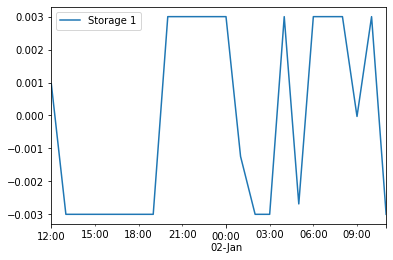

In [18]:
x_charge_2.plot()